# House price prediction of Real-Estate in Bengaluru city.

In [1]:
![image.png](attachment:benguluru house.png)

'[image.png]' is not recognized as an internal or external command,
operable program or batch file.


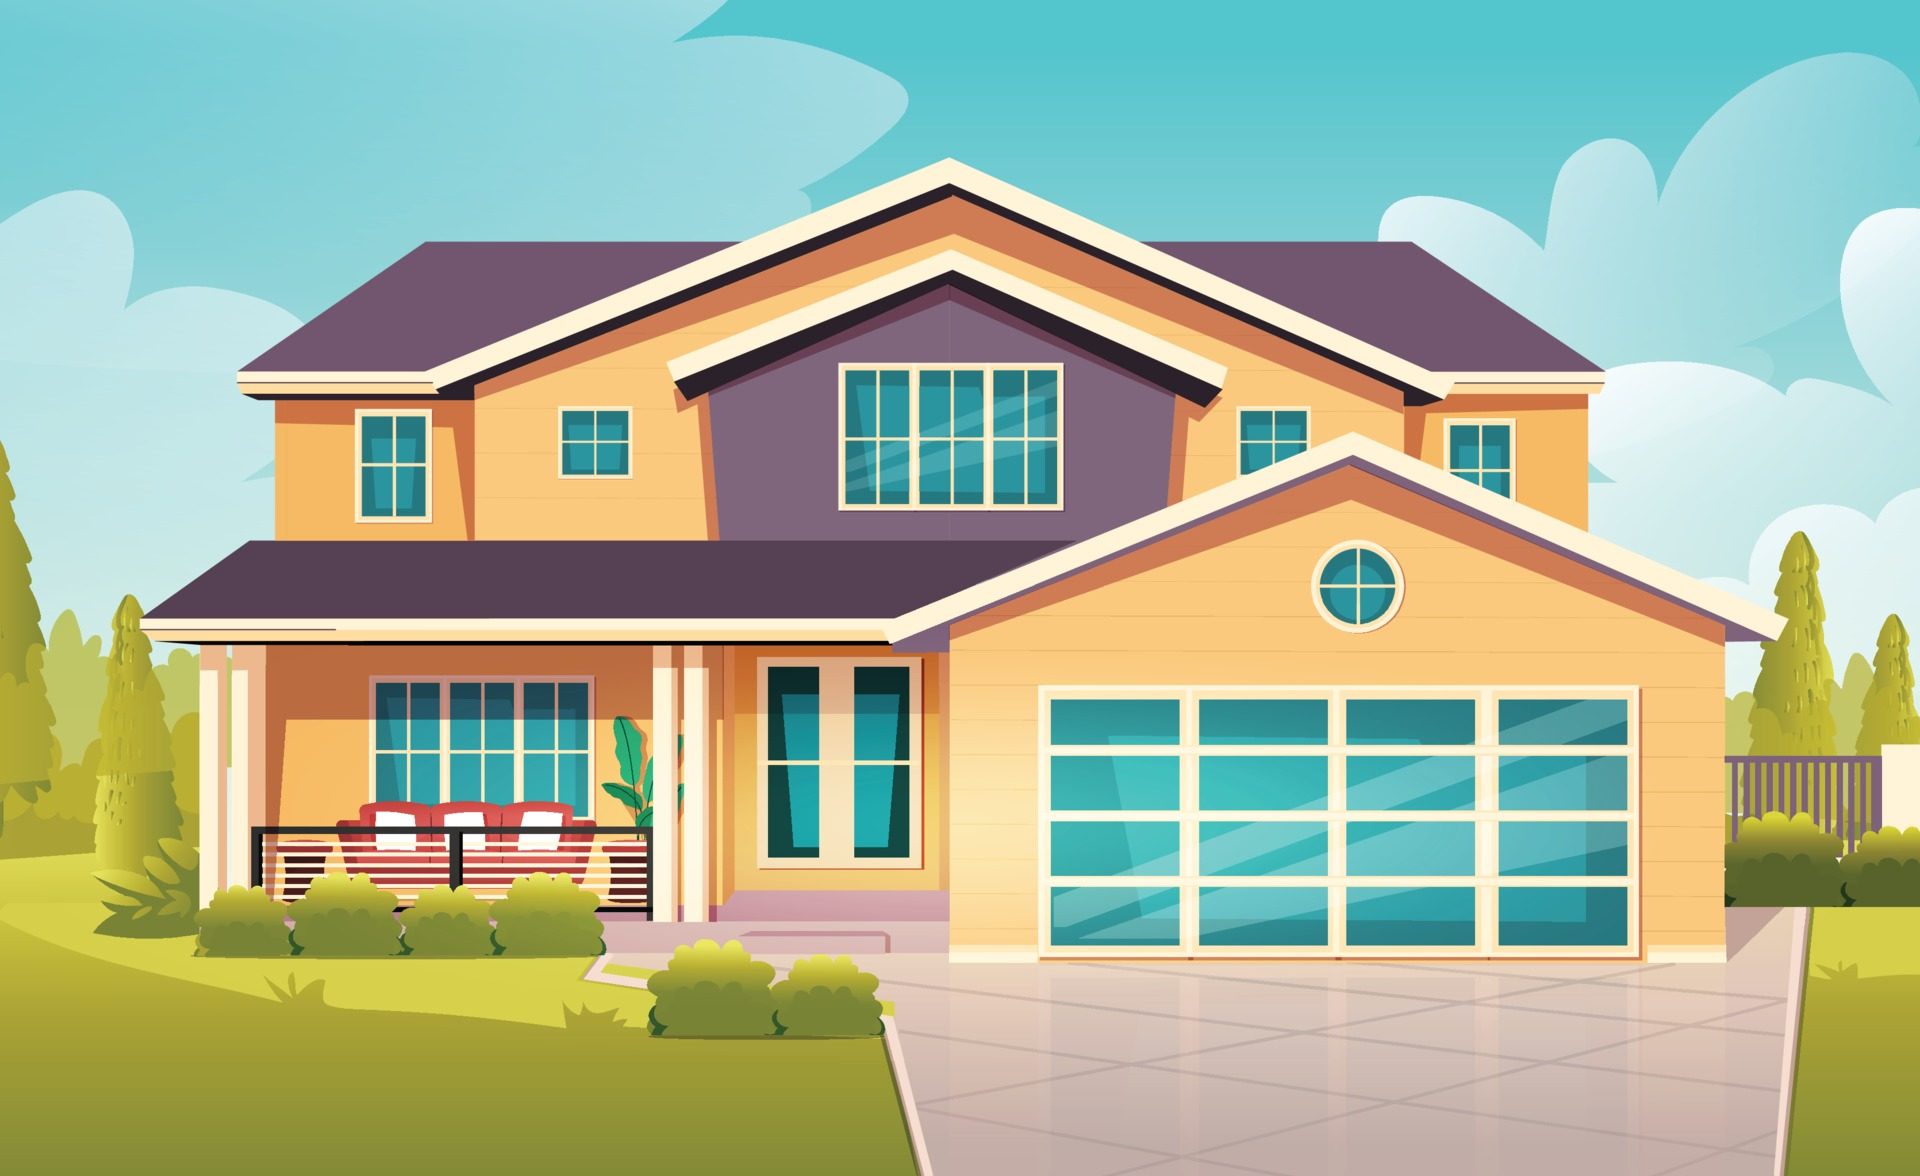

### By analyzing these Bangalore house data we will determine the approximate price for the house

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r"C:\Users\Pixel-2021-66\Documents\Desktop\Data Science\All Datasets\Bengaluru_House.csv")

In [4]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [5]:
data.shape

(13320, 9)

In [6]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


### checking the value_counts for all columns present in data

In [10]:
for column in data.columns:
    print(data[column].value_counts())

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547


### Checking for Missing Data

Here We are checking the sum of null values

In [11]:
data.isnull().sum()#you wiil see how many null values in each feature.so you will see location has the 1 null
# value and goes on

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [12]:
# production divided by rows
5502/7818

0.70376055257099

Checking for missing values showed society variable showing huge number of missing values amounting to 5502 values and balcony shows the missing values is 609 bath and size. Next step would be dropping these samples as we have sufficiently big dataset. Missing value accounts for only 1.5% of total sample size.

### Performing Group by operation on Area Type

In [13]:
data.groupby('area_type')['area_type'].agg('count')# you will see heare the area type how many unique value 
#in the features and you will getting thecounts

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

### Checking what different "Area Types" are present in the Dataset

In [14]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

<AxesSubplot:>

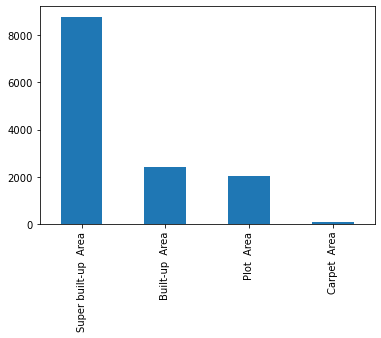

In [15]:
data.area_type.value_counts().plot(kind='bar')               

In [16]:
data['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

<AxesSubplot:>

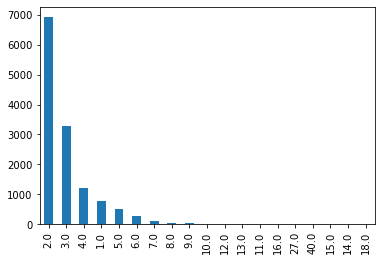

In [17]:
data.bath.value_counts().plot(kind='bar')

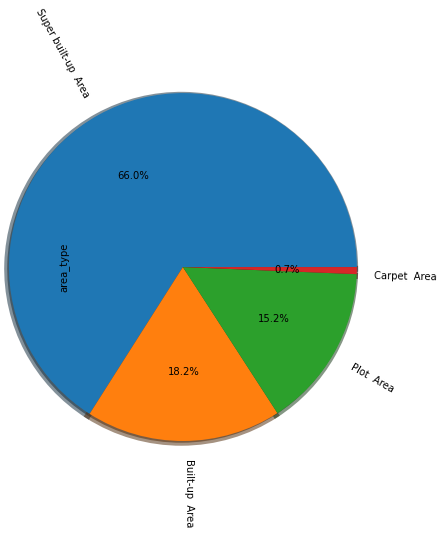

In [18]:
(data["area_type"].value_counts()).plot.pie(autopct="%.1f%%", 
                                          shadow=True,rotatelabels=True, 
                                          wedgeprops={'linewidth': 6}, radius=2)
plt.show()

### Dropping less important columns

In [19]:
data.drop(columns=['area_type', 'availability', 'society', 'balcony'], inplace=True)


In [20]:
data.shape

(13320, 5)

#### Dropping missing value values

In [21]:
data['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [22]:
data['location'] = data['location'].fillna('Whitefield')

In [23]:
data['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [24]:
data['size'] = data['size'].fillna('2 BHK')

In [25]:
data['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
40.0       1
15.0       1
14.0       1
18.0       1
Name: bath, dtype: int64

In [26]:
data['bath'].median()

2.0

In [27]:
data['bath'] = data['bath'].fillna(data['bath'].median())

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [29]:
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [30]:
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


#### variable Analysis

##### Applying unique function on feature called Size

In [31]:
#You will apply a unique meathod for the size features so i will descards all the 
data["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [32]:
#from the we can clearly see that bedrooms represented with 2 different menthods one is bhk and other is bedroom so we are
#making new column name as bhk

In [33]:
data['rooms']=data['size']

In [34]:
def calc_bhk(x):
    if pd.isnull(x):
        no=0        
    else:
        if x.split(" ")[1] =='RK':
            no = 2
        else:
            no = int(x.split(" ")[0])+2
        #print(no)
    return no

In [35]:
data['rooms'] = data['size'].apply(calc_bhk)

In [36]:
data[data['rooms']==0]

,location,size,total_sqft,bath,price,rooms


In [37]:
data.head()

,location,size,total_sqft,bath,price,rooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,4
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,6
2,Uttarahalli,3 BHK,1440,2.0,62.00,5
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,5
4,Kothanur,2 BHK,1200,2.0,51.00,4


In [38]:
data[data.rooms>20]

,location,size,total_sqft,bath,price,rooms
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,29
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,21
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,45


# Exploring total_sqft feature

In [39]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [40]:
#we will apply unique method in totail-sqft column.and we will get the values for this features and we can clearly see 
#total_sqft can be range for such a case we take a avrage of minimum and maximum value

In [41]:
def convertRange(x):
    t1=x.split('-')
    if len(t1)==2:
        return(float(t1[0])+float(t1[1]))/2
    try:
        return float(x)
    except:
        return None

In [42]:
data['total_sqft']=data['total_sqft'].apply(convertRange)

In [43]:
data.head()

,location,size,total_sqft,bath,price,rooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,4
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,6
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,5
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,5
4,Kothanur,2 BHK,1200.0,2.0,51.00,4


In [44]:
data['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [45]:
#here we are adding a new featured called price per squre foot
#so 1st We will do here  take the price column in dataframe and multiply with 1 lacks and divided bye total_sqft 
# column in the dataframe

# Price per Square Feet

In [46]:
data['price_per_sqft']=data['price']*100000 /data['total_sqft']

In [47]:
data['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [48]:
data.head()

,location,size,total_sqft,bath,price,rooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,4,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,6,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,5,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,5,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,4,4250.000000


##### we are going to use Dimentionality Reduction for the data which are categorical variable. We need to apply Dimensionality Reduction here to reduce number of locations.

In [49]:
#so here i will creat a lambda function i apply in location feature then i will get the value counts 

In [50]:
data['location'] = data['location'].apply(lambda x: x.strip())
location_count= data['location'].value_counts()
location_count
# strip()--that returns a copy of the string with both leading and trailing characters removed

Whitefield                        542
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64

In [51]:
len(location_count[location_count>=10]) #Then i will get the length of location_count which is more than equal to 10

254

In [52]:
location_count_less_than_10 = location_count[location_count<=10]
location_count_less_than_10

Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1053, dtype: int64

In [53]:
data['location'] = data['location'].apply(lambda x: 'other' if x in location_count_less_than_10 else x)
len(data.location.unique())# then also i will create a lambda function and apply the location column

242

In [54]:
data.head()

,location,size,total_sqft,bath,price,rooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,4,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,6,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,5,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,5,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,4,4250.000000


In [55]:
data['location'].value_counts()

other                 2885
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

In [56]:
data.shape

(13320, 7)

In [57]:
data[data.total_sqft/data.rooms<300].head()

,location,size,total_sqft,bath,price,rooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,4,3699.810606
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,5,4305.555556
5,Whitefield,2 BHK,1170.0,2.0,38.00,4,3247.863248
8,Marathahalli,3 BHK,1310.0,3.0,63.25,5,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,8,36274.509804


In [58]:
#data = data[~(data.total_sqft/data.rooms<300)]
data.shape


(13320, 7)

In [59]:
data.describe()

,total_sqft,bath,price,rooms,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,4.801802,7.907501e+03
std,1238.405258,1.338754,148.971674,1.296230,1.064296e+05
min,1.000000,1.000000,8.000000,2.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,4.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,5.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,5.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,45.000000,1.200000e+07


In [60]:
def remove_pps_outliers(data):
    df_out = pd.DataFrame()
    for key, subdf in data.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data = remove_pps_outliers(data)
data.shape

(11488, 7)

In [61]:
data.describe()

,total_sqft,bath,price,rooms,price_per_sqft
count,11488.000000,11488.000000,11488.000000,11488.000000,11488.000000
mean,1537.976810,2.605066,105.238232,4.718228,6303.086658
std,1145.700742,1.208022,138.520527,1.154810,3636.502296
min,250.000000,1.000000,8.000000,2.000000,267.829813
25%,1100.000000,2.000000,50.000000,4.000000,4285.714286
50%,1280.000000,2.000000,70.000000,5.000000,5311.170467
75%,1660.000000,3.000000,110.000000,5.000000,6849.601172
max,52272.000000,27.000000,3600.000000,29.000000,53150.000000


In [62]:
data.head(20)

,location,size,total_sqft,bath,price,rooms,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,6,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,5,11901.840491
2,1st Block Jayanagar,6 BHK,1200.0,6.0,125.0,8,10416.666667
3,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,5,12533.333333
4,1st Block Jayanagar,7 Bedroom,930.0,4.0,85.0,9,9139.784946
5,1st Block Jayanagar,8 Bedroom,700.0,4.0,104.0,10,14857.142857
6,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,5,10833.333333
7,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,4,11983.805668
8,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,6,15018.181818
9,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,6,15020.408163


(array([6.373e+03, 4.117e+03, 6.690e+02, 2.290e+02, 5.600e+01, 2.800e+01,
        1.100e+01, 1.000e+00, 1.000e+00, 3.000e+00]),
 array([  267.82981328,  5556.04683196, 10844.26385063, 16132.4808693 ,
        21420.69788797, 26708.91490664, 31997.13192531, 37285.34894399,
        42573.56596266, 47861.78298133, 53150.        ]),
 <BarContainer object of 10 artists>)

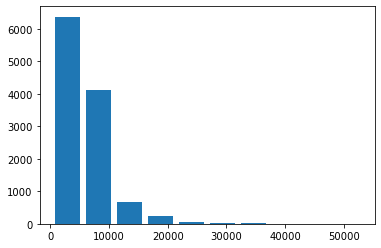

In [63]:
plt.hist(data.price_per_sqft,rwidth=0.8)

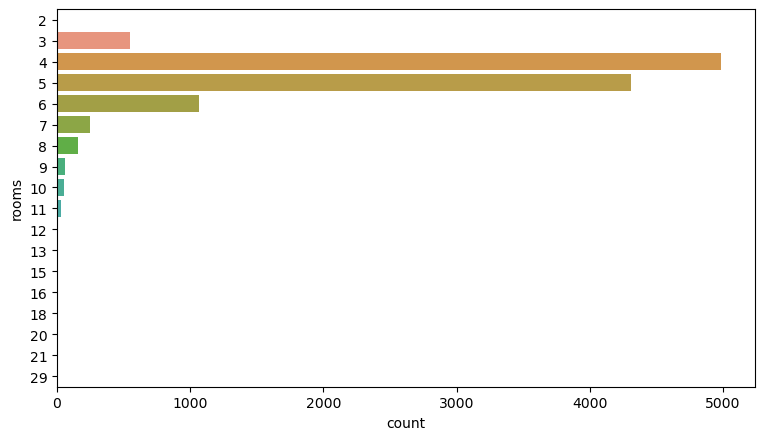

In [64]:
plt.figure(figsize=(9,5),dpi=100)
sns.countplot(data=data,y='rooms');

<AxesSubplot:xlabel='rooms', ylabel='total_sqft'>

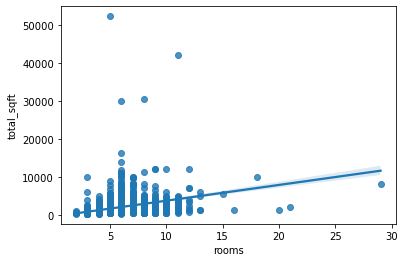

In [65]:
sns.regplot(x="rooms",y="total_sqft",data=data)

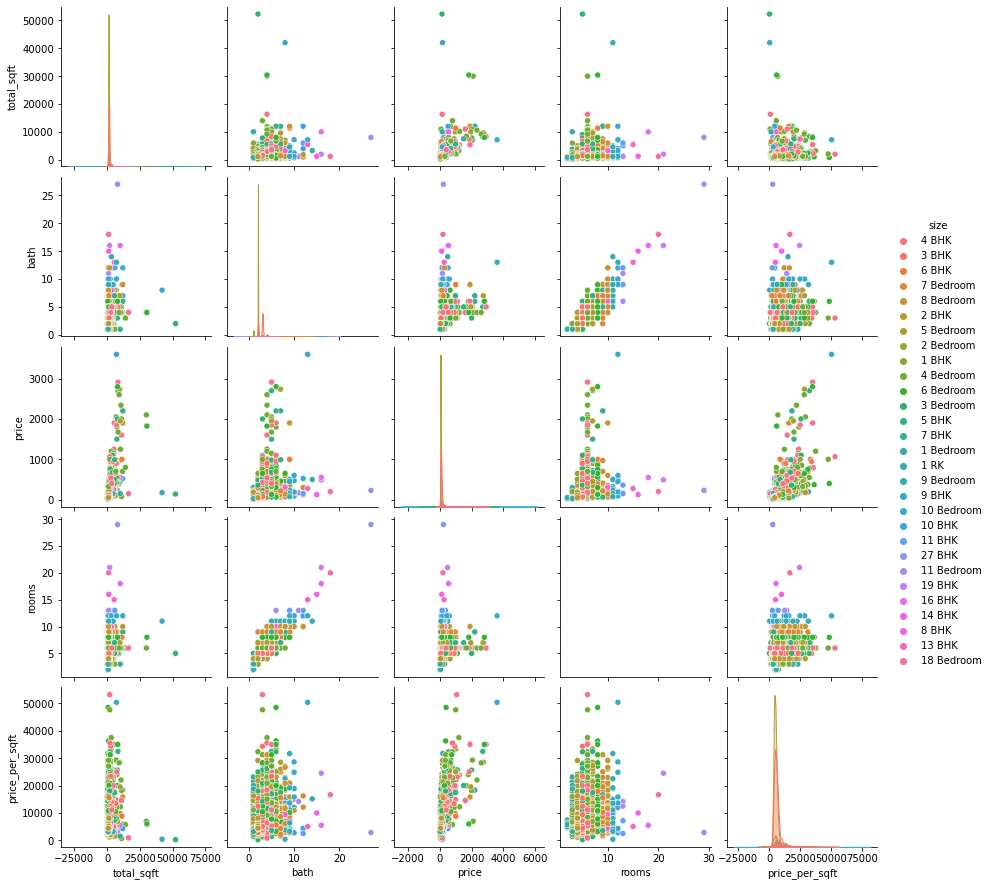

In [66]:
sns.pairplot(data,hue="size")

<AxesSubplot:xlabel='size', ylabel='price'>

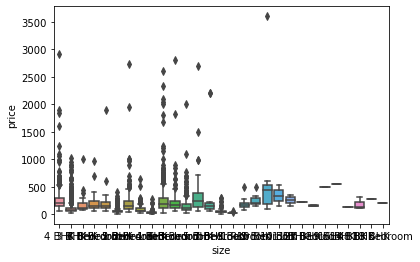

In [67]:
sns.boxplot(x="size",y="price",data=data)

<AxesSubplot:xlabel='rooms', ylabel='price'>

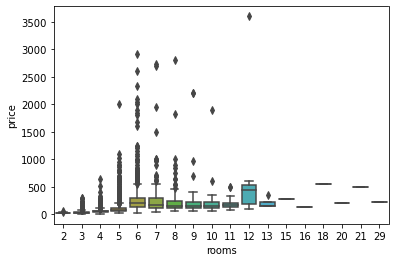

In [68]:
sns.boxplot(x="rooms",y="price",data=data)

<AxesSubplot:xlabel='bath', ylabel='price'>

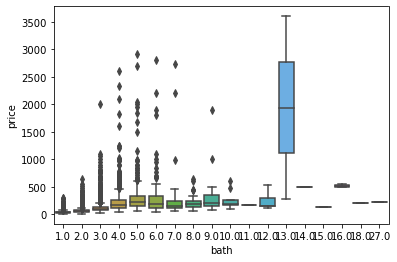

In [69]:
sns.boxplot(x="bath",y="price",data=data)

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

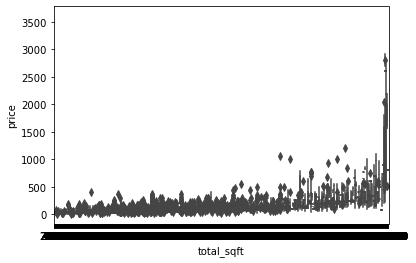

In [70]:
sns.boxplot(x="total_sqft",y="price",data=data)

<AxesSubplot:xlabel='price_per_sqft', ylabel='price'>

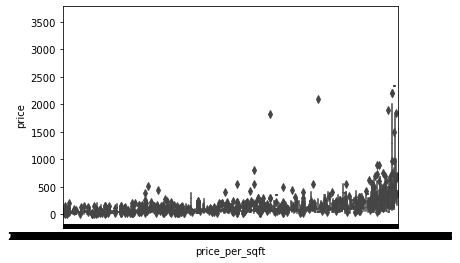

In [71]:
sns.boxplot(x="price_per_sqft",y="price",data=data)

Text(0, 0.5, 'Count')

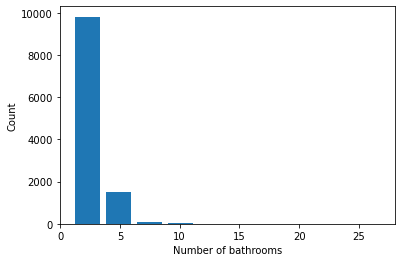

In [72]:
plt.hist(data.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [73]:
%matplotlib inline
import matplotlib 
#matplotlib.rcParams["figure.figsize"] = (20,10)

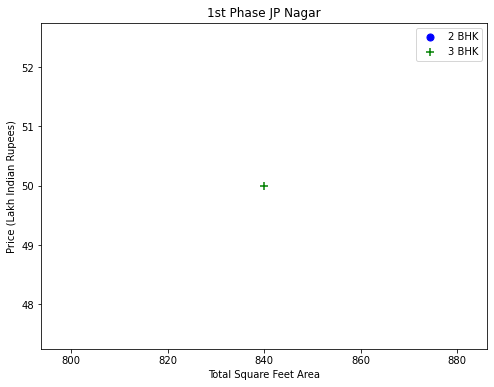

In [74]:
# Ploting the Scatter Chart for 2 BHK and 3 BHK properties
def plot_scatter_chart(data,location):
    BHK2 = data[(data.location==location) & (data.rooms==2)]
    BHK3 = data[(data.location==location) & (data.rooms==3)]
    matplotlib.rcParams['figure.figsize'] = (8,6)
    plt.scatter(BHK2.total_sqft,BHK2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(BHK3.total_sqft,BHK3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data,"1st Phase JP Nagar")

In [75]:
data.drop(columns=['size','location'], inplace=True)
data.head()

,total_sqft,bath,price,rooms,price_per_sqft
0,2850.0,4.0,428.0,6,15017.543860
1,1630.0,3.0,194.0,5,11901.840491
2,1200.0,6.0,125.0,8,10416.666667
3,1875.0,2.0,235.0,5,12533.333333
4,930.0,4.0,85.0,9,9139.784946


In [76]:
old_cols=data.columns.values
new_cols=['bath','rooms','price_per_sqft','total_sqft','price']
data=data.reindex(columns=new_cols)

In [77]:
data

,bath,rooms,price_per_sqft,total_sqft,price
0,4.0,6,15017.543860,2850.0,428.00
1,3.0,5,11901.840491,1630.0,194.00
2,6.0,8,10416.666667,1200.0,125.00
3,2.0,5,12533.333333,1875.0,235.00
4,4.0,9,9139.784946,930.0,85.00
...,...,...,...,...,...
11483,1.0,3,3201.970443,812.0,26.00
11484,2.0,5,4439.583333,1440.0,63.93
11485,2.0,4,4465.116279,1075.0,48.00
11486,5.0,6,27083.333333,1200.0,325.00


In [78]:
data.describe()

,bath,rooms,price_per_sqft,total_sqft,price
count,11488.000000,11488.000000,11488.000000,11488.000000,11488.000000
mean,2.605066,4.718228,6303.086658,1537.976810,105.238232
std,1.208022,1.154810,3636.502296,1145.700742,138.520527
min,1.000000,2.000000,267.829813,250.000000,8.000000
25%,2.000000,4.000000,4285.714286,1100.000000,50.000000
50%,2.000000,5.000000,5311.170467,1280.000000,70.000000
75%,3.000000,5.000000,6849.601172,1660.000000,110.000000
max,27.000000,29.000000,53150.000000,52272.000000,3600.000000


### Hypothesis Testing

#### Applying Z-Test 

Null Hypothesis = Mean of total_sqft and price_per_sqft is same or equal.

Alternate Hypothesis =Mean of total_sqft and price_per_sqft is not same or not equal.

In [79]:
from statsmodels.stats import weightstats
import scipy.stats as stats

In [80]:
data['total_sqft'].mean()

1537.9768101497214

In [81]:
data['price_per_sqft'].mean()

6303.086658120007

In [82]:
P1=data['total_sqft']
P2=data['price_per_sqft']

In [83]:
weightstats.ztest(P1,P2)

(-133.9556493709494, 0.0)

Here P_value is less than 0.05 .

Hence , reject the Null Hypothesis.

So, the mean of total_sqft and price_per_sqft is not same.


Null Hypothesis = Mean of price is same 

Alternate Hypothesis =Mean of price is not same  .

In [84]:
price_t=pd.DataFrame(data["price"])
price_t

,price
0,428.00
1,194.00
2,125.00
3,235.00
4,85.00
...,...
11483,26.00
11484,63.93
11485,48.00
11486,325.00


In [85]:
data['price'].mean()

105.23823206824515

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

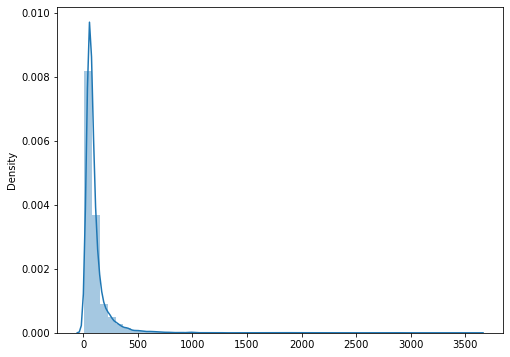

In [86]:
sns.distplot(price_t)

In [87]:
weightstats.ztest(data['price'] ,value=131.18)

(-20.07278564674199, 1.2764572612647224e-89)

Here P_value is grater than 0.05 .

Hence , Accept the Null Hypothesis.

So, the mean of price is  same.

In [88]:
data.corr()

,bath,rooms,price_per_sqft,total_sqft,price
bath,1.000000,0.882046,0.420109,0.457513,0.462470
rooms,0.882046,1.000000,0.402079,0.418467,0.404949
price_per_sqft,0.420109,0.402079,1.000000,0.199190,0.674112
total_sqft,0.457513,0.418467,0.199190,1.000000,0.622964
price,0.462470,0.404949,0.674112,0.622964,1.000000


In [89]:
#price_per_sqft is highly corelated  with price
#rooms is Moderate
#bath is moderate
# total_sqft highly corelate with price

In [90]:
import seaborn as sns

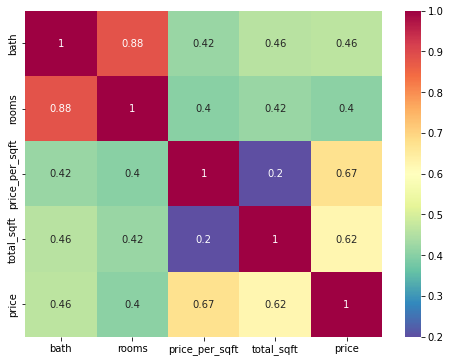

In [91]:
sns.heatmap( data.corr(),annot = True, cmap="Spectral_r")
plt.show()

In [92]:
feature_cols=['total_sqft','bath','price_per_sqft','rooms']


X=data[feature_cols]

y=data["price"]
type(y)

pandas.core.series.Series

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=10)

In [94]:
type(X_train.size)

numpy.int32

In [95]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8041, 4)
(8041,)
(3447, 4)
(3447,)


In [96]:
from sklearn.linear_model import LinearRegression
linereg =LinearRegression()
linereg.fit(X_train,y_train)

LinearRegression()

In [97]:
linereg.coef_

array([  0.05513325,  15.82001821,   0.02232451, -15.96854565])

In [98]:
linereg.intercept_

-86.19269517665032

In [99]:
y_pred = linereg.predict(X_test)
y_pred

array([130.6901605 , 270.05469211,  40.9446915 , ...,  15.96899019,
        51.92945575,  47.46936619])

In [100]:
y_test

5653     125.00
3787     220.00
131       49.98
4099      80.00
7510      50.00
          ...  
7191      85.73
3632      46.25
4374      35.00
5388      48.06
10807     56.00
Name: price, Length: 3447, dtype: float64

In [101]:
from sklearn import metrics

In [102]:
print(metrics.mean_absolute_error(y_test,y_pred))

24.303042954997263


In [103]:
print(metrics.mean_squared_error(y_test,y_pred))

4717.45586590333


In [104]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

68.68373800182493


In [105]:
y_pred=linereg.predict(X_test)

In [106]:
y_error=y_test-y_pred


In [107]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.760898860153413

### Applying KNeighors Regressor 

In [108]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=9)

In [109]:
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=9)

In [110]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

In [111]:
y_pred = knn.predict(X_test)
y_pred

array([121.82111111, 221.33333333,  50.03444444, ...,  35.00444444,
        48.03444444,  55.83333333])

In [112]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8041, 4)
(3447, 4)
(8041,)
(3447,)


In [113]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [114]:
r2_score = knn.score(X_test,y_test)

In [115]:
r2_score

0.9164567756603541

### USE K FOLD CROSS VALIDATION TO MEASURE ACCURACY OF OUR LINEAR REGRESSION MODEL

In [116]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.80046139, 0.72359258, 0.75593828, 0.74791923, 0.74163558])

to build a more generalized model.
to develop a more generalized model which can perform well on unseen data. One can build a perfect model on the training data with 100% accuracy.
K-Fold cross validation is involve splitting the dataset.
1) data are not biased. That is why we first shuffle the dataset using the shuffle function.
2)The cv hyperparameter represents the number of folds .
3)

### Applying Random Forest Regressor

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
RF=RandomForestRegressor(n_estimators=10, verbose=5)

In [119]:
RF.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


RandomForestRegressor(n_estimators=10, verbose=5)

In [120]:
y_pred = RF.predict(X_test)
y_pred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


array([124.55, 221.4 ,  50.03, ...,  35.  ,  48.5 ,  55.59])

In [121]:
r2_score = RF.score(X_test,y_test)
r2_score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.9768122078846242

The input data is continuous, and the target variable is discrete. 
The input data contains multiple variables, and each variable has only one level. 
There are no missing values in the input data. 
The data is distributed normally.

#### Applying decision Tree Regressor

In [122]:
from sklearn.tree import DecisionTreeRegressor

In [123]:
dt = DecisionTreeRegressor()             

In [124]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [125]:
y_pred = dt.predict(X_test)
y_pred

array([125., 220.,  50., ...,  35.,  49.,  57.])

In [126]:
r2_score = dt.score(X_test,y_test)
r2_score

0.9683508676429068

##### Random Forest Regressor has shown highest accuracy, followed by Decision Tree and KNeighbors Regressor. Linear Regressor has shown lowest accuracy.